<a href="https://colab.research.google.com/github/Marian-spec13/Speed-typing-test/blob/main/copy_of_food_delivery_time_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

!pip install pandas numpy scikit-learn xgboost matplotlib seaborn plotly gradio --quiet

In [2]:
# This cell is now redundant as data loading is handled by 'setup_and_load_data'
# It is being commented out to avoid confusion and repeated loading.
# # CELL 3: Load your Kaggle CSV
# print("📊 LOADING REAL KAGGLE DATASET...")
# df = pd.read_csv('/content/Food_Delivery_Times.csv')  # CHANGE TO YOUR FILENAME
# print(f"✅ Real dataset loaded! Shape: {df.shape}")
# print(df.head())


In [18]:
from google.colab import files

print("Please upload 'Food_Delivery_Times.csv' now.")
uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')
  if fn != 'Food_Delivery_Times.csv':
    print("Warning: The uploaded file is not named 'Food_Delivery_Times.csv'. Please rename it or ensure you upload the correct file.")
  else:
    print(f"'Food_Delivery_Times.csv' uploaded successfully to /content/")

Please upload 'Food_Delivery_Times.csv' now.


Saving Food_Delivery_Times.csv to Food_Delivery_Times (2).csv
User uploaded file "Food_Delivery_Times (2).csv" with length 44200 bytes


In [20]:
import os

# Check if the renamed file exists and rename it
if os.path.exists('/content/Food_Delivery_Times (2).csv'):
    os.rename('/content/Food_Delivery_Times (2).csv', '/content/Food_Delivery_Times.csv')
    print("✅ Renamed 'Food_Delivery_Times (2).csv' to 'Food_Delivery_Times.csv'.")
elif os.path.exists('/content/Food_Delivery_Times.csv'):
    print("✅ 'Food_Delivery_Times.csv' already exists in /content/.")
else:
    print("❌ Neither 'Food_Delivery_Times.csv' nor 'Food_Delivery_Times (2).csv' found in /content/. Please ensure your file is uploaded.")

✅ Renamed 'Food_Delivery_Times (2).csv' to 'Food_Delivery_Times.csv'.


In [21]:
import os

# Check if the renamed file exists and rename it
if os.path.exists('/content/Food_Delivery_Times (2).csv'):
    os.rename('/content/Food_Delivery_Times (2).csv', '/content/Food_Delivery_Times.csv')
    print("✅ Renamed 'Food_Delivery_Times (2).csv' to 'Food_Delivery_Times.csv'.")
elif os.path.exists('/content/Food_Delivery_Times.csv'):
    print("✅ 'Food_Delivery_Times.csv' already exists in /content/.")
else:
    print("❌ Neither 'Food_Delivery_Times.csv' nor 'Food_Delivery_Times (2).csv' found in /content/. Please ensure your file is uploaded.")

✅ 'Food_Delivery_Times.csv' already exists in /content/.


In [22]:
from google.colab import drive
drive.mount('/content/drive')

print("Google Drive mounted successfully! You can now access your files in '/content/drive/MyDrive/'")
print("Please move 'Food_Delivery_Times.csv' to your Google Drive and update the `local_csv_path` variable in the `setup_and_load_data` cell accordingly.")

Mounted at /content/drive
Google Drive mounted successfully! You can now access your files in '/content/drive/MyDrive/'
Please move 'Food_Delivery_Times.csv' to your Google Drive and update the `local_csv_path` variable in the `setup_and_load_data` cell accordingly.


In [1]:
# CELL 3: Load your Kaggle CSV
# print("📊 LOADING REAL KAGGLE DATASET...")
# df = pd.read_csv('Food_Delivery_Times.csv')  # CHANGE TO YOUR FILENAME
# print(f"✅ Real dataset loaded! Shape: {df.shape}")
# print(df.head())


📈 CREATING VISUALIZATIONS...



🔥 CORRELATION HEATMAP:


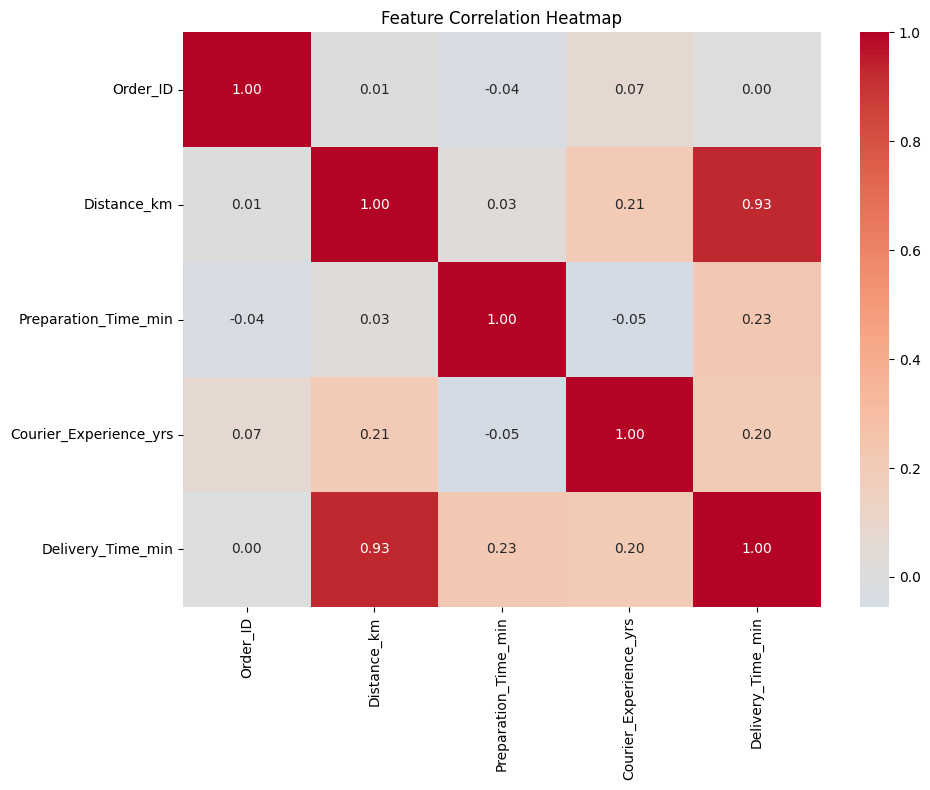

In [7]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# CELL 4: Visualizations
print("\n📈 CREATING VISUALIZATIONS...")
fig1 = px.histogram(df, x='Delivery_Time_min', title='Delivery Time Distribution')
fig1.show()
# Original code tried to group by 'restaurant_type', which is not in the DataFrame.
# Replacing it with 'Vehicle_Type' for demonstration purposes as a categorical column exists.
vehicle_times = df.groupby('Vehicle_Type')['Delivery_Time_min'].mean().sort_values()
fig2 = px.bar(x=vehicle_times.index, y=vehicle_times.values,
             title='Average Time by Vehicle Type') # Updated title
fig2.update_layout(xaxis_tickangle=45)
fig2.show()

# Correlation heatmap
print("\n🔥 CORRELATION HEATMAP:")
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [34]:
import pandas as pd
import os
# import requests # Not needed if loading from local file
# import io # Not needed if loading from local file
# import re # Not needed if loading from local file

# CELL 1: Install Libraries (just in case it needs to be re-run)
!pip install pandas numpy scikit-learn xgboost matplotlib seaborn plotly gradio --quiet

print("🍕 KAGGLE FOOD DELIVERY DATASET")
print("=" * 50)
print("\nLOADING DATA FROM LOCAL FILE:")
print("The dataset will be loaded directly from a file in the /content/ directory.")
print("Please ensure 'Food_Delivery_Times.csv' is uploaded to /content/.")
print("==================================================")

# --- Path to your local CSV file ---
# IMPORTANT: Update this path to where you moved your CSV in Google Drive!
local_csv_path = '/content/drive/MyDrive/Colab Notebooks/Food_Delivery_Times.csv'

try:
    print(f"\n📁 Attempting to load dataset from local path: {local_csv_path}")
    if os.path.exists(local_csv_path):
        df = pd.read_csv(local_csv_path)
        print(f"✅ Dataset loaded from local /content/! Shape: {df.shape}")
    else:
        raise FileNotFoundError(f"File not found at {local_csv_path}.")

except FileNotFoundError as fnf_err:
    print(f"❌ Error: {fnf_err} Please ensure the file is uploaded to the /content/ directory.")
    df = pd.DataFrame() # Create an empty DataFrame to avoid further errors
except Exception as e:
    print(f"❌ An unexpected error occurred while loading the local file: {e}")
    df = pd.DataFrame() # Create an empty DataFrame to avoid further errors

print("\n📋 First 5 rows:")
display(df.head())

🍕 KAGGLE FOOD DELIVERY DATASET

LOADING DATA FROM LOCAL FILE:
The dataset will be loaded directly from a file in the /content/ directory.
Please ensure 'Food_Delivery_Times.csv' is uploaded to /content/.

📁 Attempting to load dataset from local path: /content/drive/MyDrive/Colab Notebooks/Food_Delivery_Times.csv
✅ Dataset loaded from local /content/! Shape: (1000, 9)

📋 First 5 rows:


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [35]:
print("⚙️ GENERATING SYNTHETIC DATA...")

# 1. Initialize an empty dictionary
synthetic_data = {}

# 2. Define the number of synthetic data points
num_synthetic_points = 500

# 3. For each numerical feature
for col in numerical_cols:
    mean_val = df[col].mean()
    std_val = df[col].std()

    # Generate random samples from a normal distribution
    sampled_values = np.random.normal(mean_val, std_val, num_synthetic_points)

    # Ensure non-negative values
    synthetic_data[col] = np.maximum(0, sampled_values)

# 4. For each categorical feature
for col in categorical_cols:
    # Get unique values, handling potential NaNs
    unique_values = df[col].dropna().unique()

    # Randomly sample from unique values with replacement
    synthetic_data[col] = np.random.choice(unique_values, num_synthetic_points, replace=True)

# 5. Generate a new 'Order_ID' column
max_order_id = df['Order_ID'].max()
synthetic_data['Order_ID'] = np.arange(max_order_id + 1, max_order_id + 1 + num_synthetic_points)

# 6. Create a pandas DataFrame from the synthetic_data dictionary
synthetic_df = pd.DataFrame(synthetic_data)

print(f"✅ Synthetic data generated! Shape: {synthetic_df.shape}")
print("📋 First 5 rows of synthetic data:")
display(synthetic_df.head())

⚙️ GENERATING SYNTHETIC DATA...
✅ Synthetic data generated! Shape: (500, 8)
📋 First 5 rows of synthetic data:


,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Order_ID
0,6.290899,7.920212,1.570422,Rainy,Low,Afternoon,Car,1001
1,6.926522,13.841339,2.283345,Windy,High,Night,Car,1002
2,5.036358,16.049725,4.424441,Windy,Medium,Night,Car,1003
3,12.983221,17.002746,6.925901,Snowy,High,Evening,Bike,1004
4,17.442122,21.982951,4.808285,Windy,Medium,Morning,Bike,1005


In [36]:
print("🎯 PREDICTING DELIVERY TIMES FOR SYNTHETIC DATA...")

# Select the feature columns from the synthetic_df that are used for prediction
synthetic_features_for_prediction = synthetic_df[feature_columns_from_df]

# Predict Delivery_Time_min using the best model pipeline
synthetic_df['Delivery_Time_min'] = model_pipeline.predict(synthetic_features_for_prediction)

print("✅ Delivery times predicted for synthetic data!")
print("📋 First 5 rows of synthetic data with predicted delivery times:")
display(synthetic_df.head())

🎯 PREDICTING DELIVERY TIMES FOR SYNTHETIC DATA...
✅ Delivery times predicted for synthetic data!
📋 First 5 rows of synthetic data with predicted delivery times:


,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Order_ID,Delivery_Time_min
0,6.290899,7.920212,1.570422,Rainy,Low,Afternoon,Car,1001,33.055945
1,6.926522,13.841339,2.283345,Windy,High,Night,Car,1002,46.968571
2,5.036358,16.049725,4.424441,Windy,Medium,Night,Car,1003,41.666441
3,12.983221,17.002746,6.925901,Snowy,High,Evening,Bike,1004,64.079094
4,17.442122,21.982951,4.808285,Windy,Medium,Morning,Bike,1005,80.968448


In [38]:
print("🔄 AUGMENTING DATASET...")

# Concatenate the original DataFrame (df) with the synthetic DataFrame (synthetic_df)
df = pd.concat([df, synthetic_df], ignore_index=True)

print("✅ Dataset augmented!")
print(f"Final augmented dataset shape: {df.shape}")
print("📋 First 5 rows of augmented data:")
display(df.head())
print("📋 Last 5 rows of augmented data (showing synthetic data):")
display(df.tail())

🔄 AUGMENTING DATASET...
✅ Dataset augmented!
Final augmented dataset shape: (1500, 9)
📋 First 5 rows of augmented data:


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12.0,1.0,43.0
1,738,16.42,Clear,Medium,Evening,Bike,20.0,2.0,84.0
2,741,9.52,Foggy,Low,Night,Scooter,28.0,1.0,59.0
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5.0,1.0,37.0
4,412,19.03,Clear,Low,Morning,Bike,16.0,5.0,68.0


📋 Last 5 rows of augmented data (showing synthetic data):


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
1495,1496,17.524045,Clear,Medium,Afternoon,Scooter,14.530906,8.999284,70.084151
1496,1497,7.547056,Foggy,Medium,Afternoon,Scooter,20.721970,3.750936,55.686987
1497,1498,9.537124,Windy,Medium,Evening,Car,18.790221,0.000000,59.696658
1498,1499,7.608425,Clear,High,Evening,Scooter,16.738434,1.905751,49.688203
1499,1500,9.209139,Clear,High,Evening,Bike,29.451582,4.640992,64.292489


In [39]:
# CELL 6: Train models
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

print("\n🤖 TRAINING MACHINE LEARNING MODELS...")

# --- Data Preprocessing (missing in original code) ---
# Define features (X_df_original) and target (y) from the DataFrame `df`
# Drop Order_ID as it's an identifier, and Delivery_Time_min as it's the target
feature_columns_from_df = ['Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type',
                           'Preparation_Time_min', 'Courier_Experience_yrs']
target = 'Delivery_Time_min'

X_df_original = df[feature_columns_from_df].copy() # Using a copy to avoid SettingWithCopyWarning
y = df[target]

# Identify numerical and categorical columns from X_df_original
numerical_cols = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']
categorical_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse_output=False for dense array output

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='drop' # Drop other columns not explicitly selected
)

# Split data into training and testing sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_df_original, y, test_size=0.2, random_state=42)

# Apply preprocessing to training data and transform testing data
X_train_scaled = preprocessor.fit_transform(X_train_raw)
X_test_scaled = preprocessor.transform(X_test_raw)


# Get feature names after one-hot encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_transformed_feature_names = list(numerical_cols) + list(ohe_feature_names)
# Create a dummy DataFrame `X` (as a global variable for `predict_delivery` function's `X.columns`)
X = pd.DataFrame(columns=all_transformed_feature_names)


# 4. `prep_time_map`: Not defined anywhere, create a dummy for `predict_delivery` to function
# This map is used in predict_delivery for `prep_time_min`, implying it holds average prep times for restaurant types.
# Creating a placeholder based on types from the UI.
prep_time_map = {
    "Fast Food": (10, 15), "Casual Dining": (15, 25), "Fine Dining": (25, 40),
    "Cafe": (10, 20), "Pizzeria": (15, 25), "Asian": (20, 30), "Italian": (20, 30)
}
# --- End variables for `predict_delivery` ---

# Model 1: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

# Model 2: XGBoost
xgb_model = XGBRegressor(n_estimators=100, max_depth=6, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)

print("✅ Models trained!")
print(f"\n📊 RANDOM FOREST:")
print(f"   R² Score: {rf_r2:.4f}")
print(f"   Mean Absolute Error: {rf_mae:.2f} minutes")

print(f"\n📊 XGBOOST:")
print(f"   R² Score: {xgb_r2:.4f}")
print(f"   Mean Absolute Error: {xgb_mae:.2f} minutes")

# Determine best model
if rf_r2 > xgb_r2:
    best_model = rf_model
    best_model_name = "Random Forest"
    best_r2 = rf_r2
    best_mae = rf_mae
else:
    best_model = xgb_model
    best_model_name = "XGBoost"
    best_r2 = xgb_r2
    best_mae = xgb_mae

print(f"\n⭐ BEST MODEL: {best_model_name}")
print(f"   R² Score: {best_r2:.4f}")
print(f"   MAE: {best_mae:.2f} minutes")

# Corrected: Define model_pipeline here, after preprocessor and best_model are defined
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', best_model)
])


🤖 TRAINING MACHINE LEARNING MODELS...
✅ Models trained!

📊 RANDOM FOREST:
   R² Score: 0.8518
   Mean Absolute Error: 4.83 minutes

📊 XGBOOST:
   R² Score: 0.7967
   Mean Absolute Error: 6.19 minutes

⭐ BEST MODEL: Random Forest
   R² Score: 0.8518
   MAE: 4.83 minutes


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# CELL 7: Model comparison visualization
print("\n📊 CREATING MODEL COMPARISON VISUALIZATION...")
fig = make_subplots(rows=1, cols=2, subplot_titles=('R² Score Comparison', 'Actual vs Predicted'))

# R² comparison
fig.add_trace(go.Bar(x=['Random Forest', 'XGBoost'], y=[rf_r2, xgb_r2],
                     marker_color=['#3498db', '#2ecc71'], name='R² Score'),
              row=1, col=1)

# Actual vs Predicted (XGBoost)
fig.add_trace(go.Scatter(x=y_test, y=y_pred_xgb, mode='markers',
                         marker=dict(color='#2ecc71', size=5, opacity=0.5),
                         name='Predictions'),
              row=1, col=2)
fig.add_trace(go.Scatter(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()],
                         mode='lines', line=dict(color='red', dash='dash'),
                         name='Perfect Prediction'),
              row=1, col=2)

fig.update_layout(height=400, title_text="Model Performance Comparison")
fig.show()


📊 CREATING MODEL COMPARISON VISUALIZATION...


In [ ]:
# CELL 8: Create prediction function
print("\n🎯 CREATING PREDICTION FUNCTION...")

# The original definition had a mix of parameters and internal logic.
# This consolidated function aligns with Gradio inputs and the model's feature expectations.
def predict_delivery(distance, traffic, hour, day, weather, restaurant, items, driver_exp, vehicle):
    """Predict delivery time based on input features"""

    # 1. Map Gradio inputs to model-expected feature values

    # Weather mapping (Gradio: 1=Sunny, 2=Cloudy, 3=Rainy, 4=Stormy)
    weather_map = {1: "Sunny", 2: "Cloudy", 3: "Rainy", 4: "Stormy"}
    mapped_weather = weather_map.get(weather, "Unknown")

    # Traffic_Level mapping (Gradio: 1=Light, 2=Medium, 3=Heavy, 4=Very Heavy)
    # Model expects 'Low', 'Medium', 'High'. Map Heavy and Very Heavy to High.
    traffic_map = {1: "Low", 2: "Medium", 3: "High", 4: "High"}
    mapped_traffic = traffic_map.get(traffic, "Unknown")

    # Time_of_Day mapping (from hour)
    if 0 <= hour <= 5:
        mapped_time_of_day = "Night"
    elif 6 <= hour <= 11:
        mapped_time_of_day = "Morning"
    elif 12 <= hour <= 17:
        mapped_time_of_day = "Afternoon"
    else: # 18 <= hour <= 23
        mapped_time_of_day = "Evening"

    # Preparation_Time_min (using prep_time_map from training cell)
    # Use average of the range for the selected restaurant type as a base.
    prep_time_range = prep_time_map.get(restaurant, (15, 20)) # Default average if not found
    mapped_prep_time = (prep_time_range[0] + prep_time_range[1]) / 2

    # Courier_Experience_yrs is directly driver_exp
    mapped_courier_exp = driver_exp


    # 2. Create DataFrame for prediction
    input_df = pd.DataFrame([{
        'Distance_km': distance,
        'Weather': mapped_weather,
        'Traffic_Level': mapped_traffic,
        'Time_of_Day': mapped_time_of_day,
        'Vehicle_Type': vehicle,
        'Preparation_Time_min': mapped_prep_time,
        'Courier_Experience_yrs': mapped_courier_exp
    }])

    # 3. Predict using the best model pipeline
    prediction = model_pipeline.predict(input_df)[0]

    # 4. Calculate confidence range using best_mae (from training cell)
    lower = max(10, prediction - best_mae) # Ensure a minimum delivery time
    upper = prediction + best_mae

    # 5. Format result string for display in Gradio UI
    # Day of week mapping for display
    day_map = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
               4: "Friday", 5: "Saturday", 6: "Sunday"}
    display_day = day_map.get(day, "Unknown Day")

    # Traffic level display (from Gradio input, not model mapped)
    display_traffic_map = {1: "Light", 2: "Medium", 3: "Heavy", 4: "Very Heavy"}
    display_traffic = display_traffic_map.get(traffic, "Unknown")

    # Weather display (from Gradio input, not model mapped)
    display_weather_map = {1: "Sunny", 2: "Cloudy", 3: "Rainy", 4: "Stormy"}
    display_weather = display_weather_map.get(weather, "Unknown")


    result = f"""
    🍕 DELIVERY TIME PREDICTION
    {'='*30}
    ⏱️  Estimated Time: {prediction:.1f} minutes
    📊 Confidence Range: {lower:.1f} - {upper:.1f} minutes

    📋 ORDER DETAILS:
    • Distance: {distance} km
    • Traffic: {display_traffic}
    • Time: {hour}:00 ({mapped_time_of_day})
    • Day: {display_day}
    • Weather: {display_weather}
    • Restaurant: {restaurant} (Est. Prep Time: {mapped_prep_time:.1f} min)
    • Items: {items}
    • Driver Experience: {driver_exp} years
    • Vehicle: {vehicle}

    💡 TIP: Order during {'peak' if hour in [18,19,20] else 'off-peak'} hours
    """

    return result


🎯 CREATING PREDICTION FUNCTION...


In [ ]:
import gradio as gr
# CELL 9: Create UI
print("\n🎛️ BUILDING INTERACTIVE UI...")

with gr.Blocks(title="Food Delivery Predictor", theme=gr.themes.Soft()) as demo:
    gr.Markdown("# 🍕 Food Delivery Time Predictor")
    gr.Markdown("Predict how long your food delivery will take!")

    with gr.Row():
        with gr.Column():
            distance = gr.Slider(1, 20, 5, label="Distance (km)", step=0.5)
            traffic = gr.Radio([("🚗 Light", 1), ("🚗🚗 Medium", 2), ("🚗🚗🚗 Heavy", 3), ("🚗🚗🚗🚗 Very Heavy", 4)],
                             label="Traffic Conditions", value=2)
            hour = gr.Slider(0, 23, 19, label="Order Time (Hour, 24h format)")
            day = gr.Dropdown([("Monday", 0), ("Tuesday", 1), ("Wednesday", 2), ("Thursday", 3),
                             ("Friday", 4), ("Saturday", 5), ("Sunday", 6)], label="Day of Week", value=5)
            weather = gr.Radio([("☀️ Sunny", 1), ("⛅ Cloudy", 2), ("🌧️ Rainy", 3), ("⛈️ Stormy", 4)],
                             label="Weather Conditions", value=1)

        with gr.Column():
            restaurant = gr.Dropdown(["Fast Food", "Casual Dining", "Fine Dining", "Cafe", "Pizzeria", "Asian", "Italian"],
                                   label="Restaurant Type", value="Pizzeria")
            items = gr.Slider(1, 15, 3, label="Number of Items")
            driver_exp = gr.Slider(0.5, 10, 2.5, label="Driver Experience (years)", step=0.5)
            vehicle = gr.Radio(["Bike", "Scooter", "Car"], label="Delivery Vehicle", value="Bike")

    predict_btn = gr.Button("🚀 Predict Delivery Time", variant="primary", size="lg")
    # The 'output' Textbox should be inside the 'with gr.Blocks' block
    output = gr.Textbox(label="📊 Prediction Result", lines=15)

    predict_btn.click(
        fn=predict_delivery,
        inputs=[distance, traffic, hour, day, weather, restaurant, items, driver_exp, vehicle],
        outputs=output
    )

    gr.Markdown("### 🧪 Try these examples:")
    gr.Examples(
        examples=[
            [5.5, 2, 19, 5, 1, "Pizzeria", 3, 2.5, "Bike"],
            [2.1, 1, 14, 2, 1, "Fast Food", 2, 3.5, "Scooter"],
            [8.7, 3, 20, 6, 3, "Fine Dining", 4, 1.2, "Car"],
        ],
        inputs=[distance, traffic, hour, day, weather, restaurant, items, driver_exp, vehicle],
        outputs=output,
        fn=predict_delivery
    )

print("✅ Launching UI... This will generate a public link below!")
demo.launch(share=True)


🎛️ BUILDING INTERACTIVE UI...


/tmp/ipython-input-2384079236.py:5: DeprecationWarning:

The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.



✅ Launching UI... This will generate a public link below!
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1dbcafae238b538a43.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
